In [1]:
import pandas as pd
import pickle
from opensky_api import OpenSkyApi

# Partie 1

In [2]:
with open('data/states.pkl', 'rb') as handle:
    states = pickle.load(handle)

In [ ]:
print(len(states.states))

first = states.states[0]
print(first)


8512
{   'baro_altitude': 11277.6,
    'callsign': 'SWR8XA  ',
    'category': 0,
    'geo_altitude': 11353.8,
    'icao24': '4b1817',
    'last_contact': 1760788253,
    'latitude': 52.0132,
    'longitude': 11.8111,
    'on_ground': False,
    'origin_country': 'Switzerland',
    'position_source': 0,
    'sensors': None,
    'spi': False,
    'squawk': '3033',
    'time_position': 1760788253,
    'true_track': 32.14,
    'velocity': 215.67,
    'vertical_rate': -0.33}


In [13]:
for col in vars(first):
    print(col)

icao24
callsign
origin_country
time_position
last_contact
longitude
latitude
baro_altitude
on_ground
velocity
true_track
vertical_rate
sensors
geo_altitude
squawk
spi
position_source
category


In [ ]:
df=pd.DataFrame()
for col in vars(states.states[0]):
    df[col]=None


for i in range(0,len(states.states)): 
    avion = states.states[i]
    for col in vars(avion).keys():
        df.loc[i,col]=vars(avion)[col]
df

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,category
0,4b1817,SWR8XA,Switzerland,1760788253,1760788253,11.8111,52.0132,11277.6,False,215.67,32.14,-0.33,None,11353.8,3033,False,0,0
1,a6fe0f,N55LC,United States,1760788254,1760788254,6.6519,43.3129,2133.6,False,128.36,93.68,-0.33,None,2278.38,6316,False,0,0
2,ab1644,UAL1085,United States,1760788253,1760788254,-97.7805,26.1019,11871.96,False,239.4,21.82,0,None,12534.9,3212,False,0,0
3,aa8c39,UAL1735,United States,1760788253,1760788253,-110.4285,37.5333,11887.2,False,272.18,63.87,0,None,12275.82,2627,False,0,0
4,ac96b8,AAL1281,United States,1760788253,1760788253,-86.6809,28.0442,10972.8,False,215.14,295.65,0,None,11582.4,3324,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8507,e94c7c,BOV304,Bolivia,1760788250,1760788251,-68.1768,-16.7333,5798.82,False,188.64,159.74,3.25,None,6195.06,None,False,0,0
8508,458664,CAT336,Denmark,1760788253,1760788253,20.9582,45.0189,11582.4,False,222.97,332.37,0,None,11734.8,6011,False,0,0
8509,00a51a,SAA023,South Africa,1760788253,1760788253,28.7836,-25.2695,7917.18,False,216.22,190.7,-10.4,None,8412.48,None,False,0,0
8510,458666,CAT674,Denmark,1760788253,1760788253,16.0968,51.073,11582.4,False,206.91,336.56,0,None,11582.4,3207,False,0,0


In [6]:
df['icao24'].nunique()

8512

8512 avions volent ne ce moment dans le monde

In [18]:
df[(df['on_ground']==1) & (df['squawk']!=None)].shape[0]

650

650 sont aux sol mais avec le transpondeur allumé

In [11]:
carre=(df['latitude']<=51)&(df['latitude']>=42)&(df['longitude']<=8)&(df['longitude']>=-5)
df[carre]['velocity'].mean()
carre=(df['latitude']<=51)&(df['latitude']>=42)&(df['longitude']<=8)&(df['longitude']>=-5)

155,77 m/s comme vitesse moyenne autour du carré de la France métropolitaine

In [20]:
#df['vitesse_vs_altitude']=df['velocity']/df['baro_altitude']

In [ ]:
## Classe Avion

: 

In [7]:
class Avion:
    """
    Représente un aéronef avec ses caractéristiques de vol essentielles.
    
    Attributes:
        icao24 (str): Adresse ICAO24 du transpondeur (identifiant unique)
        callsign (str): Indicatif d'appel de l'appareil
        longitude (float): Longitude en degrés (WGS-84)
        latitude (float): Latitude en degrés (WGS-84)
        velocity (float): Vitesse au sol en m/s
        true_track (float): Direction vraie en degrés (0 = nord)
        on_ground (bool): True si l'avion est au sol
    """
    
    def __init__(self, icao24, callsign, longitude, latitude, velocity, true_track, on_ground):
        self.icao24 = icao24
        self.callsign = callsign if callsign else "N/A"
        self.longitude = longitude
        self.latitude = latitude
        self.velocity = velocity if velocity is not None else 0.0
        self.true_track = true_track if true_track is not None else 0.0
        self.on_ground = on_ground
    
    @classmethod
    def from_state_vector(cls, state_vector):
        """
        Crée une instance d'Avion à partir d'un StateVector d'OpenSky API.
        
        Args:
            state_vector: Objet StateVector retourné par OpenSky API
            
        Returns:
            Avion: Instance d'Avion avec les données extraites
        """
        return cls(
            icao24=state_vector.icao24,
            callsign=state_vector.callsign.strip() if state_vector.callsign else None,
            longitude=state_vector.longitude,
            latitude=state_vector.latitude,
            velocity=state_vector.velocity,
            true_track=state_vector.true_track,
            on_ground=state_vector.on_ground
        )
    
    @classmethod
    def from_dict(cls, data):
        """
        Crée une instance d'Avion à partir d'un dictionnaire.
        
        Args:
            data (dict): Dictionnaire contenant les attributs de l'avion
            
        Returns:
            Avion: Instance d'Avion avec les données du dictionnaire
        """
        return cls(
            icao24=data['icao24'],
            callsign=data['callsign'],
            longitude=data['longitude'],
            latitude=data['latitude'],
            velocity=data['velocity'],
            true_track=data['true_track'],
            on_ground=data['on_ground']
        )
    
    def to_dict(self):
        """
        Convertit l'objet Avion en dictionnaire.
        
        Returns:
            dict: Dictionnaire contenant tous les attributs de l'avion
        """
        return {
            'icao24': self.icao24,
            'callsign': self.callsign,
            'longitude': self.longitude,
            'latitude': self.latitude,
            'velocity': self.velocity,
            'true_track': self.true_track,
            'on_ground': self.on_ground
        }
    
    def get_velocity_kmh(self):
        """
        Retourne la vitesse en km/h.
        
        Returns:
            float: Vitesse en km/h
        """
        return self.velocity * 3.6
    
    def is_valid_position(self):
        """
        Vérifie si l'avion possède des coordonnées valides.
        
        Returns:
            bool: True si longitude et latitude ne sont pas None
        """
        return self.longitude is not None and self.latitude is not None
    
    def __repr__(self):
        """
        Représentation textuelle de l'objet Avion.
        
        Returns:
            str: Chaîne décrivant l'avion
        """
        status = "au sol" if self.on_ground else "en vol"
        return (f"Avion(icao24={self.icao24}, callsign={self.callsign}, "
                f"pos=({self.latitude:.2f}, {self.longitude:.2f}), "
                f"vitesse={self.get_velocity_kmh():.0f} km/h, "
                f"cap={self.true_track:.0f}°, {status})")

In [8]:
Avion.from_dict(df.iloc[0])

Avion(icao24=4b1817, callsign=SWR8XA  , pos=(52.01, 11.81), vitesse=776 km/h, cap=32°, en vol)

In [9]:
liste_avions=[]
for i in range(0,5):
    liste_avions.append(Avion.from_state_vector(df.iloc[i]))
liste_avions

[Avion(icao24=4b1817, callsign=SWR8XA, pos=(52.01, 11.81), vitesse=776 km/h, cap=32°, en vol),
 Avion(icao24=a6fe0f, callsign=N55LC, pos=(43.31, 6.65), vitesse=462 km/h, cap=94°, en vol),
 Avion(icao24=ab1644, callsign=UAL1085, pos=(26.10, -97.78), vitesse=862 km/h, cap=22°, en vol),
 Avion(icao24=aa8c39, callsign=UAL1735, pos=(37.53, -110.43), vitesse=980 km/h, cap=64°, en vol),
 Avion(icao24=ac96b8, callsign=AAL1281, pos=(28.04, -86.68), vitesse=775 km/h, cap=296°, en vol)]

In [12]:
df_france=df[carre]
liste_france=[]
for i in range(0,len(df_france)):
    liste_france.append(Avion.from_dict(df_france.iloc[i]))

liste_france

[Avion(icao24=a6fe0f, callsign=N55LC   , pos=(43.31, 6.65), vitesse=462 km/h, cap=94°, en vol),
 Avion(icao24=408124, callsign=EXS93H  , pos=(49.49, 2.56), vitesse=723 km/h, cap=339°, en vol),
 Avion(icao24=39de4c, callsign=TVF38NC , pos=(44.84, 1.31), vitesse=733 km/h, cap=356°, en vol),
 Avion(icao24=39822c, callsign=FHARM   , pos=(48.75, 2.07), vitesse=115 km/h, cap=72°, en vol),
 Avion(icao24=39de51, callsign=TVF77BX , pos=(45.13, -0.83), vitesse=754 km/h, cap=29°, en vol),
 Avion(icao24=39de53, callsign=TVF7991 , pos=(48.48, 2.25), vitesse=514 km/h, cap=290°, en vol),
 Avion(icao24=4952cd, callsign=TAP641  , pos=(47.02, -4.01), vitesse=843 km/h, cap=205°, en vol),
 Avion(icao24=4952ce, callsign=TAP67M  , pos=(46.06, -4.70), vitesse=831 km/h, cap=203°, en vol),
 Avion(icao24=393ef1, callsign=PXR7P   , pos=(47.08, 1.43), vitesse=504 km/h, cap=179°, en vol),
 Avion(icao24=4b180c, callsign=SWR339H , pos=(48.49, 6.99), vitesse=864 km/h, cap=158°, en vol),
 Avion(icao24=407a05, callsign

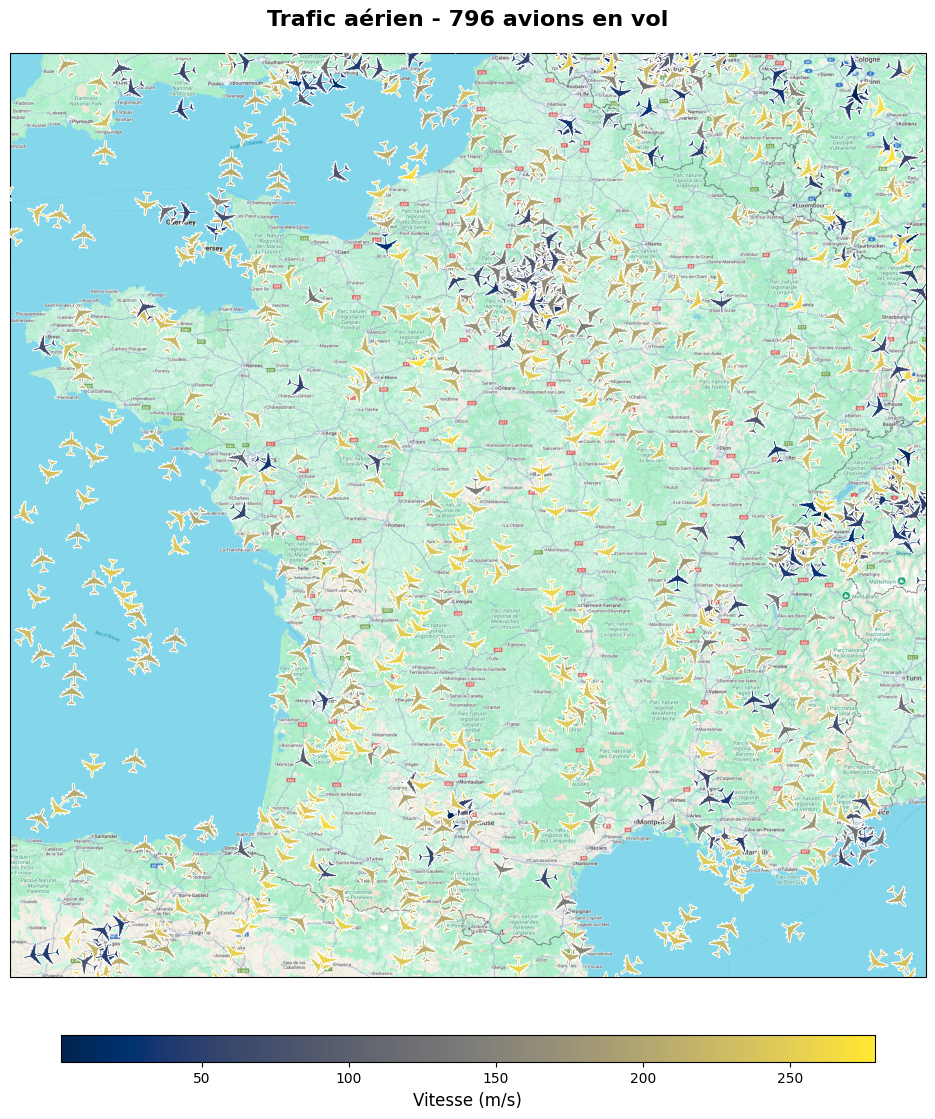

In [13]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize
from matplotlib.textpath import TextPath
from matplotlib.transforms import Affine2D
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import numpy as np

def plot(liste_avion, *args, **kwargs):
    """
    Affiche les avions sur une carte avec rotation selon direction et couleur selon vitesse.
    
    Args:
        liste_avion: Liste d'objets Avion
        show_callsign: (bool) Afficher les indicatifs (défaut: False)
        show_ground: (bool) Afficher les avions au sol (défaut: False)
    """
    fig = plt.figure(figsize=(15, 15))



    
    
    stamen_terrain = cimgt.GoogleTiles("RGB")
    ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
    ax.set_extent([-5, 8, 42, 51], crs=ccrs.Geodetic())
    ax.add_image(cimgt.GoogleTiles("RGB"), 8)
    
    # Symbole avion
    SYMBOL = TextPath((0, 0), "✈")
    
    # Options
    show_callsign = kwargs.get('show_callsign', False)
    show_ground = kwargs.get('show_ground', False)
    
    # Filtrer les avions valides
    avions_valides = []
    for avion in liste_avion:
        if avion.longitude is None or avion.latitude is None:
            continue
        if not show_ground and avion.on_ground:
            continue
        avions_valides.append(avion)
    
    if not avions_valides:
        print("Aucun avion à afficher")
        return
    
    # Normalisation des vitesses pour les couleurs
    vitesses = [a.velocity for a in avions_valides]
    if len(vitesses) > 0 and max(vitesses) > 0:
        norm = Normalize(vmin=min(vitesses), vmax=max(vitesses))
        cmap = plt.cm.cividis  
    else:
        norm = None
        cmap = None
    
    # Affichage des avions
    for avion in avions_valides:
        # Rotation selon la direction (true_track)
        # 0° = Nord, donc on pivote de (90 - true_track) pour l'affichage
        angle_rotation = 90 - avion.true_track
        
        # Créer la transformation de rotation
        t = Affine2D().rotate_deg(angle_rotation).scale(0.08)
        
        # Créer le marker avec rotation
        marker = MarkerStyle(SYMBOL)
        marker._transform = t
        
        # Couleur basée sur la vitesse
        if cmap and norm:
            couleur = cmap(norm(avion.velocity))
        else:
            couleur = 'red'
        
        # Couleur spéciale pour avions au sol
        if avion.on_ground:
            couleur = 'gray'
        
        # Afficher l'avion
        ax.plot(
            avion.longitude,
            avion.latitude,
            marker=marker,
            color=couleur,
            markersize=30,
            transform=ccrs.PlateCarree(),
            markeredgecolor='white',
            markeredgewidth=0.8,
            zorder=10
        )
        
        # Afficher le callsign si demandé
        if show_callsign and avion.callsign and avion.callsign != "N/A":
            ax.text(
                avion.longitude + 0.15,
                avion.latitude + 0.15,
                avion.callsign,
                fontsize=7,
                transform=ccrs.PlateCarree(),
                color="black",
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7),
                zorder=11
            )
    
    # Ajouter une barre de couleur pour les vitesses
    if cmap and norm:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', 
                           pad=0.05, shrink=0.7, aspect=30)
        cbar.set_label('Vitesse (m/s)', fontsize=12)
    
    # Titre avec statistiques
    nb_vol = sum(1 for a in avions_valides if not a.on_ground)
    nb_sol = sum(1 for a in avions_valides if a.on_ground)
    
    titre = f'Trafic aérien - {nb_vol} avions en vol'
    if show_ground:
        titre += f', {nb_sol} au sol'
    ax.set_title(titre, fontsize=16, fontweight='bold', pad=20)
    
    
    
    
    fig.savefig("carte.jpg")
    plt.show()



plot(liste_france)


## Partie 2

Appareils Air France : 13 juin 2022

In [14]:
df2 = pd.read_pickle("data/AA_daily.dat")
df2

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04
...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94


In [15]:
df2['date'] = pd.to_datetime(df2['time'], unit='s')
df2

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude,date
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78,2022-06-13 00:00:10
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30,2022-06-13 00:00:20
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96,2022-06-13 00:00:30
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38,2022-06-13 00:00:40
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04,2022-06-13 00:00:50
...,...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86,2022-06-13 23:59:10
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06,2022-06-13 23:59:20
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26,2022-06-13 23:59:30
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94,2022-06-13 23:59:40


In [28]:
df2

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude,date
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78,2022-06-13 00:00:10
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30,2022-06-13 00:00:20
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96,2022-06-13 00:00:30
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38,2022-06-13 00:00:40
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04,2022-06-13 00:00:50
...,...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86,2022-06-13 23:59:10
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06,2022-06-13 23:59:20
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26,2022-06-13 23:59:30
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94,2022-06-13 23:59:40


In [16]:
class Avion:
    """
    Représente un aéronef avec ses caractéristiques de vol essentielles.
    
    Attributes:
        icao24 (str): Adresse ICAO24 du transpondeur (identifiant unique)
        callsign (str): Indicatif d'appel de l'appareil
        longitude (float): Longitude en degrés (WGS-84)
        latitude (float): Latitude en degrés (WGS-84)
        velocity (float): Vitesse au sol en m/s
        true_track (float): Direction vraie en degrés (0 = nord)
        on_ground (bool): True si l'avion est au sol
    """
    
    def __init__(self, icao24, callsign, longitude, latitude, velocity, true_track, on_ground):
        self.icao24 = icao24
        self.callsign = callsign if callsign else "N/A"
        self.longitude = longitude
        self.latitude = latitude
        self.velocity = velocity if velocity is not None else 0.0
        self.true_track = true_track if true_track is not None else 0.0
        self.on_ground = on_ground
    
    @classmethod
    def from_state_vector(cls, state_vector):
        """
        Crée une instance d'Avion à partir d'un StateVector d'OpenSky API.
        
        Args:
            state_vector: Objet StateVector retourné par OpenSky API
            
        Returns:
            Avion: Instance d'Avion avec les données extraites
        """
        return cls(
            icao24=state_vector.icao24,
            callsign=state_vector.callsign.strip() if state_vector.callsign else None,
            longitude=state_vector.longitude,
            latitude=state_vector.latitude,
            velocity=state_vector.velocity,
            true_track=state_vector.true_track,
            on_ground=state_vector.on_ground
        )
    
    @classmethod
    def from_dict(cls, data):
        """
        Crée une instance d'Avion à partir d'un dictionnaire.
        
        Args:
            data (dict): Dictionnaire contenant les attributs de l'avion
            
        Returns:
            Avion: Instance d'Avion avec les données du dictionnaire
        """
        return cls(
            icao24=data['icao24'],
            callsign=data['callsign'],
            longitude=data['longitude'],
            latitude=data['latitude'],
            velocity=data['velocity'],
            true_track=data['true_track'],
            on_ground=data['on_ground']
        )
    
    def to_dict(self):
        """
        Convertit l'objet Avion en dictionnaire.
        
        Returns:
            dict: Dictionnaire contenant tous les attributs de l'avion
        """
        return {
            'icao24': self.icao24,
            'callsign': self.callsign,
            'longitude': self.longitude,
            'latitude': self.latitude,
            'velocity': self.velocity,
            'true_track': self.true_track,
            'on_ground': self.on_ground
        }
    
    def get_velocity_kmh(self):
        """
        Retourne la vitesse en km/h.
        
        Returns:
            float: Vitesse en km/h
        """
        return self.velocity * 3.6
    
    def is_valid_position(self):
        """
        Vérifie si l'avion possède des coordonnées valides.
        
        Returns:
            bool: True si longitude et latitude ne sont pas None
        """
        return self.longitude is not None and self.latitude is not None
    
    def __repr__(self):
        """
        Représentation textuelle de l'objet Avion.
        
        Returns:
            str: Chaîne décrivant l'avion
        """
        status = "au sol" if self.on_ground else "en vol"
        return (f"Avion(icao24={self.icao24}, callsign={self.callsign}, "
                f"pos=({self.latitude:.2f}, {self.longitude:.2f}), "
                f"vitesse={self.get_velocity_kmh():.0f} km/h, "
                f"cap={self.true_track:.0f}°, {status})")

Calculs

In [17]:
min_date=df2['date'].min()
max_date=df2['date'].max()
delta=max_date-min_date
delta

Timedelta('0 days 23:59:40')

1 jour

In [31]:
df2

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude,date
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78,2022-06-13 00:00:10
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30,2022-06-13 00:00:20
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96,2022-06-13 00:00:30
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38,2022-06-13 00:00:40
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04,2022-06-13 00:00:50
...,...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86,2022-06-13 23:59:10
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06,2022-06-13 23:59:20
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26,2022-06-13 23:59:30
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94,2022-06-13 23:59:40


## Aéronefs

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
df3 = pd.read_csv("data/aircraftDatabase-2022-06.csv")
df3

,icao24,registration,manufacturericao,manufacturername,model,typecode,serialnumber,linenumber,icaoaircrafttype,operator,operatorcallsign,operatoricao,operatoriata,owner,testreg,registered,reguntil,status,built,firstflightdate,seatconfiguration,engines,modes,adsb,acars,notes,categoryDescription
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
1,aa3487,N757F,NaN,Raytheon Aircraft Company,A36,NaN,E-3121,NaN,NaN,NaN,NaN,NaN,NaN,Vintage Aircraft Llc,NaN,NaN,2023-01-31,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
2,ae267b,6533,VOUGHT,Aerospatiale,MH-65C Dolphin,AS65,6182,NaN,H2T,NaN,NaN,NaN,NaN,United States Coast Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,No ADS-B Emitter Category Information
3,a4fa61,N42MH,NaN,Piper,PA-31-350,NaN,31-7852015,NaN,NaN,NaN,NaN,NaN,NaN,Vv Flights Services Llc,NaN,NaN,2024-08-31,NaN,1977-01-01,NaN,NaN,LYCOMING TI0-540 SER,False,False,False,NaN,NaN
4,c04101,C-FYQA,NaN,Champion Aircraft Corporation,7GCA (Champion),NaN,420,NaN,NaN,NaN,NaN,NaN,NaN,Ronald W Court (court Air Services),NaN,2016-03-29,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459995,a8571f,N6365T,VOLPAR,Beech,C-45H,BE18,AF-617,NaN,L2P,NaN,NaN,NaN,NaN,Hans O Lauridsen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
459996,a7f1b0,N6104P,NaN,Piper,PA-24-250,NaN,24-1202,NaN,NaN,NaN,NaN,NaN,NaN,Kimsey Thomas W,NaN,NaN,2024-01-31,NaN,1959-01-01,NaN,NaN,LYCOMING 0-540 SERIES,False,False,False,NaN,NaN
459997,c0a4c8,C-IKKL,NaN,Rsultra Inc.,Kangook MF (Kangook),NaN,605,NaN,NaN,NaN,NaN,NaN,NaN,Serge Mathon,NaN,2014-05-02,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
459998,a7d3b0,N603PG,NaN,Sikorsky,UH-60A,NaN,80-23501,NaN,NaN,NaN,NaN,NaN,NaN,Pacific Gas And Electric Co,NaN,NaN,2025-02-28,NaN,1980-01-01,NaN,NaN,GE T700 SERIES,False,False,False,NaN,Light (< 15500 lbs)


<Axes: >

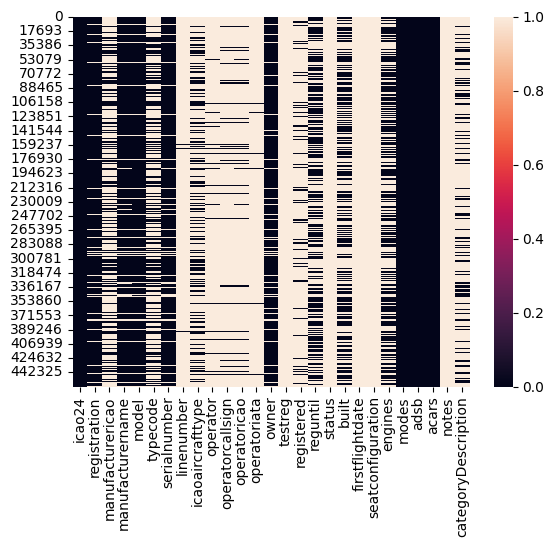

In [34]:
import seaborn as sns
sns.heatmap(df3.isna())

In [35]:
df2

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude,date
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78,2022-06-13 00:00:10
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30,2022-06-13 00:00:20
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96,2022-06-13 00:00:30
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38,2022-06-13 00:00:40
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04,2022-06-13 00:00:50
...,...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86,2022-06-13 23:59:10
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06,2022-06-13 23:59:20
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26,2022-06-13 23:59:30
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94,2022-06-13 23:59:40


In [36]:
df3

,icao24,registration,manufacturericao,manufacturername,model,typecode,serialnumber,linenumber,icaoaircrafttype,operator,operatorcallsign,operatoricao,operatoriata,owner,testreg,registered,reguntil,status,built,firstflightdate,seatconfiguration,engines,modes,adsb,acars,notes,categoryDescription
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
1,aa3487,N757F,NaN,Raytheon Aircraft Company,A36,NaN,E-3121,NaN,NaN,NaN,NaN,NaN,NaN,Vintage Aircraft Llc,NaN,NaN,2023-01-31,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
2,ae267b,6533,VOUGHT,Aerospatiale,MH-65C Dolphin,AS65,6182,NaN,H2T,NaN,NaN,NaN,NaN,United States Coast Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,No ADS-B Emitter Category Information
3,a4fa61,N42MH,NaN,Piper,PA-31-350,NaN,31-7852015,NaN,NaN,NaN,NaN,NaN,NaN,Vv Flights Services Llc,NaN,NaN,2024-08-31,NaN,1977-01-01,NaN,NaN,LYCOMING TI0-540 SER,False,False,False,NaN,NaN
4,c04101,C-FYQA,NaN,Champion Aircraft Corporation,7GCA (Champion),NaN,420,NaN,NaN,NaN,NaN,NaN,NaN,Ronald W Court (court Air Services),NaN,2016-03-29,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459995,a8571f,N6365T,VOLPAR,Beech,C-45H,BE18,AF-617,NaN,L2P,NaN,NaN,NaN,NaN,Hans O Lauridsen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
459996,a7f1b0,N6104P,NaN,Piper,PA-24-250,NaN,24-1202,NaN,NaN,NaN,NaN,NaN,NaN,Kimsey Thomas W,NaN,NaN,2024-01-31,NaN,1959-01-01,NaN,NaN,LYCOMING 0-540 SERIES,False,False,False,NaN,NaN
459997,c0a4c8,C-IKKL,NaN,Rsultra Inc.,Kangook MF (Kangook),NaN,605,NaN,NaN,NaN,NaN,NaN,NaN,Serge Mathon,NaN,2014-05-02,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
459998,a7d3b0,N603PG,NaN,Sikorsky,UH-60A,NaN,80-23501,NaN,NaN,NaN,NaN,NaN,NaN,Pacific Gas And Electric Co,NaN,NaN,2025-02-28,NaN,1980-01-01,NaN,NaN,GE T700 SERIES,False,False,False,NaN,Light (< 15500 lbs)


In [37]:
df3['registration'].nunique()

420703

In [38]:
df3['serialnumber'].nunique()

281012

Colonnes utiles pour lier à d'autres bases de données : icao24

In [20]:
df4=pd.merge(df2,df3[['icao24','manufacturername','manufacturericao','model','engines','serialnumber']],on='icao24',how='inner')
df4

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude,date,manufacturername,manufacturericao,model,engines,serialnumber
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78,2022-06-13 00:00:10,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30,2022-06-13 00:00:20,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96,2022-06-13 00:00:30,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38,2022-06-13 00:00:40,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04,2022-06-13 00:00:50,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86,2022-06-13 23:59:10,Boeing,BOEING,777-323ER,GE GE90-115B,31546
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06,2022-06-13 23:59:20,Boeing,BOEING,777-323ER,GE GE90-115B,31546
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26,2022-06-13 23:59:30,Boeing,BOEING,777-323ER,GE GE90-115B,31546
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94,2022-06-13 23:59:40,Boeing,BOEING,777-323ER,GE GE90-115B,31546


In [30]:
df4['icao24'].unique()

array(['a28036', 'a03bcd', 'acee50', 'a584bc', 'ab9b13', 'a57d42',
       'ac767c', 'ad036e', 'a2c90d', 'ac91d4', 'adab31', 'a6fa94',
       'a4e6c0', 'ac0dd9', 'acea99', 'a6451a', 'a77ad8', 'ad1986',
       'a566da', 'a0835d', 'a7a257', 'ab6c26', 'a01fee', 'abedc8',
       'acd1f6', 'ac2dea', 'a57229', 'a3b4d6', 'a32bf5', 'a7045b',
       'ac5569', 'ad24ab', 'aa435b', 'aae5a9', 'a51425', 'ab6b02',
       'ad5d5f', 'a9f461', 'a997e5', 'a50192', 'a37eb0', 'a317ba',
       'ab4ea8', 'aa2abc', 'a7101e', 'a9ddb0', 'a73e6d', 'a014c9',
       'a72f91', 'abe2a3', 'a32056', 'a9819b', 'a8e6f2', 'a2fa6a',
       'ac756c', 'a3c9c5', 'a05c59', 'a78d6b', 'a2bdff', 'a639f5',
       'a7f3ae', 'a3373a', 'a515ad', 'ab284d', 'a6f6dd', 'ac2a33',
       'a2b2da', 'a95a1c', 'a9b088', 'acf975', 'a09239', 'aa5237',
       'a5031a', 'a3b529', 'a0433b', 'ac5cd7', 'a01c37', 'ad8769',
       'a575e0', 'a313bf', 'ad4873', 'a01112', 'ac754b', 'a6bf4e',
       'ac75a5', 'ad6116', 'aaea84', 'ab84c9', 'a2bbac', 'ab88

In [21]:
df_icao24=df4[df4['icao24']=='a28036']
df_icao24=df_icao24.rename(columns={'lon':'longitude',
                          'lat':'latitude',
                          'onground':'on_ground'})
df_icao24['true_track']=None

In [41]:
Avion.from_dict(df.iloc[2])

Avion(icao24=ab1644, callsign=UAL1085 , pos=(26.10, -97.78), vitesse=862 km/h, cap=22°, en vol)

In [22]:
L=[]
for i in range(0,len(df_icao24)):
    L.append(Avion.from_dict(df.iloc[i]))

In [31]:
df_icao24=df4[df4['icao24']=='a7101e']
df_icao24=df_icao24.rename(columns={'lon':'longitude',
                          'lat':'latitude',
                          'onground':'on_ground'})
df_icao24['true_track']=None

In [32]:
L = [Avion.from_dict(df_icao24.iloc[i]) for i in range(len(df_icao24))]
L

[Avion(icao24=a7101e, callsign=AAL2318 , pos=(33.98, -102.93), vitesse=835 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(33.98, -102.95), vitesse=837 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(33.99, -102.98), vitesse=837 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(33.99, -103.00), vitesse=837 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(33.99, -103.03), vitesse=837 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(33.99, -103.05), vitesse=837 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(34.00, -103.08), vitesse=837 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(34.00, -103.10), vitesse=836 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(34.00, -103.13), vitesse=836 km/h, cap=0°, en vol),
 Avion(icao24=a7101e, callsign=AAL2318 , pos=(34.01, -103.15), vitesse=837 km/h, cap=0°, en vol),
 Avion(icao24=a7101e

In [44]:
Avion.from_state_vector

<bound method Avion.from_state_vector of <class '__main__.Avion'>>

In [25]:
class Avion:
    """
    Représente un aéronef avec ses caractéristiques de vol essentielles.
    
    Attributes:
        icao24 (str): Adresse ICAO24 du transpondeur (identifiant unique)
        callsign (str): Indicatif d'appel de l'appareil
        longitude (float): Longitude en degrés (WGS-84)
        latitude (float): Latitude en degrés (WGS-84)
        velocity (float): Vitesse au sol en m/s
        true_track (float): Direction vraie en degrés (0 = nord)
        on_ground (bool): True si l'avion est au sol
    """
    
    def __init__(self, icao24, callsign, longitude, latitude, velocity, true_track, on_ground):
        self.icao24 = icao24
        self.callsign = callsign if callsign else "N/A"
        self.longitude = longitude
        self.latitude = latitude
        self.velocity = velocity if velocity is not None else 0.0
        self.true_track = true_track if true_track is not None else 0.0
        self.on_ground = on_ground
    
    @classmethod
    def from_state_vector(cls, state_vector):
        """
        Crée une instance d'Avion à partir d'un StateVector d'OpenSky API.
        
        Args:
            state_vector: Objet StateVector retourné par OpenSky API
            
        Returns:
            Avion: Instance d'Avion avec les données extraites
        """
        return cls(
            icao24=state_vector.icao24,
            callsign=state_vector.callsign.strip() if state_vector.callsign else None,
            longitude=state_vector.longitude,
            latitude=state_vector.latitude,
            velocity=state_vector.velocity,
            true_track=state_vector.true_track,
            on_ground=state_vector.on_ground
        )
    
    @classmethod
    def from_dict(cls, data):
        """
        Crée une instance d'Avion à partir d'un dictionnaire.
        
        Args:
            data (dict): Dictionnaire contenant les attributs de l'avion
            
        Returns:
            Avion: Instance d'Avion avec les données du dictionnaire
        """
        return cls(
            icao24=data['icao24'],
            callsign=data['callsign'],
            longitude=data['longitude'],
            latitude=data['latitude'],
            velocity=data['velocity'],
            true_track=data['true_track'],
            on_ground=data['on_ground']
        )
    
    def to_dict(self):
        """
        Convertit l'objet Avion en dictionnaire.
        
        Returns:
            dict: Dictionnaire contenant tous les attributs de l'avion
        """
        return {
            'icao24': self.icao24,
            'callsign': self.callsign,
            'longitude': self.longitude,
            'latitude': self.latitude,
            'velocity': self.velocity,
            'true_track': self.true_track,
            'on_ground': self.on_ground
        }
    
    def get_velocity_kmh(self):
        """
        Retourne la vitesse en km/h.
        
        Returns:
            float: Vitesse en km/h
        """
        return self.velocity * 3.6
    
    def is_valid_position(self):
        """
        Vérifie si l'avion possède des coordonnées valides.
        
        Returns:
            bool: True si longitude et latitude ne sont pas None
        """
        return self.longitude is not None and self.latitude is not None
    
    def __repr__(self):
        """
        Représentation textuelle de l'objet Avion.
        
        Returns:
            str: Chaîne décrivant l'avion
        """
        status = "au sol" if self.on_ground else "en vol"
        return (f"Avion(icao24={self.icao24}, callsign={self.callsign}, "
                f"pos=({self.latitude:.2f}, {self.longitude:.2f}), "
                f"vitesse={self.get_velocity_kmh():.0f} km/h, "
                f"cap={self.true_track:.0f}°, {status})")

In [46]:
icao_24_af=df2['icao24'].unique()
icao_24_aero=df3['icao24'].unique()
len([e for e in icao_24_af if e in icao_24_aero])

480

In [47]:
df3.columns

Index(['icao24', 'registration', 'manufacturericao', 'manufacturername',
       'model', 'typecode', 'serialnumber', 'linenumber', 'icaoaircrafttype',
       'operator', 'operatorcallsign', 'operatoricao', 'operatoriata', 'owner',
       'testreg', 'registered', 'reguntil', 'status', 'built',
       'firstflightdate', 'seatconfiguration', 'engines', 'modes', 'adsb',
       'acars', 'notes', 'categoryDescription'],
      dtype='object')

In [48]:
df3['manufacturername'].value_counts()

manufacturername
Cessna                      69642
Piper                       43074
Beech                       17762
Boeing                      15176
Cessna Aircraft Company      9651
                            ...  
Helquist Lindsay A Jr           1
Miller F P/weitman D            1
Rhodes Howard Stanley Jr        1
Piper Robert D                  1
Kenneth L Cox                   1
Name: count, Length: 39179, dtype: int64

In [49]:
df3['manufacturericao'].value_counts()

manufacturericao
BOEING                  13246
AIRBUS                  10727
CESSNA                   9708
RAYTHEON                 7156
ROBINSON                 7006
                        ...  
Hawker 800XP                1
Gulfstream Aerospace        1
UL-JIH                      1
G1 AVIATION                 1
GAME COMPOSITES LLC         1
Name: count, Length: 622, dtype: int64

In [56]:
df4

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude,date,manufacturername,manufacturericao,model,engines,serialnumber
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78,2022-06-13 00:00:10,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30,2022-06-13 00:00:20,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96,2022-06-13 00:00:30,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38,2022-06-13 00:00:40,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04,2022-06-13 00:00:50,Embraer S A,NaN,ERJ 170-200 LR,GE CF34-8E5,17000699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86,2022-06-13 23:59:10,Boeing,BOEING,777-323ER,GE GE90-115B,31546
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06,2022-06-13 23:59:20,Boeing,BOEING,777-323ER,GE GE90-115B,31546
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26,2022-06-13 23:59:30,Boeing,BOEING,777-323ER,GE GE90-115B,31546
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94,2022-06-13 23:59:40,Boeing,BOEING,777-323ER,GE GE90-115B,31546


In [33]:
dff=pd.DataFrame([a.to_dict() for a in L])

In [27]:
dff

,icao24,callsign,longitude,latitude,velocity,true_track,on_ground
0,a9a750,AAL930P,-46.316223,-23.299116,149.607710,0.0,False
1,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
2,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
3,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
4,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
5,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
6,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
7,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
8,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False
9,a9a750,AAL930P,-46.316223,-23.299116,150.334762,0.0,False


In [34]:
long_min=dff['longitude'].min()
long_max=dff['longitude'].max()
lat_min=dff['latitude'].min()
lat_max=dff['latitude'].max()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_11192\2890933713.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('jet')


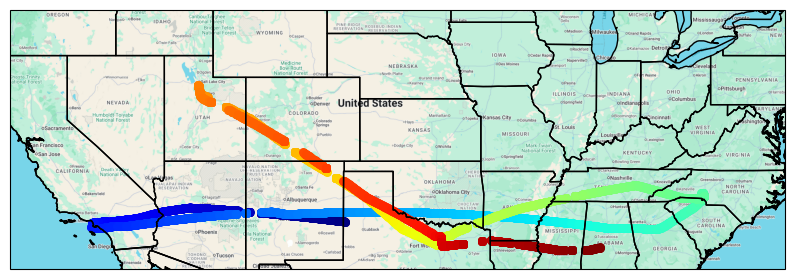

In [35]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cf
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10),dpi=100)

tile=cimgt.GoogleTiles("RGB")
ax = fig.add_subplot(1, 1, 1, projection=tile.crs)
# Limit the extent of the map to a small longitude/latitude range.
window=[long_min-5,long_max+5,lat_min-1,lat_max+1]
ax.set_extent(window, crs=ccrs.Geodetic())


ax.add_image(tile,6)
#option light avec les caractéristiques sus nomées
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.STATES)
ax.add_feature(cf.COASTLINE)

cmap = plt.cm.get_cmap('jet')
for i in range(0,len(dff)):
    x=dff.loc[i,'longitude']
    y=dff.loc[i,'latitude']
    ax.scatter(x, y, color=cmap(i / len(dff)), s=30, transform=ccrs.Geodetic())
plt.show()

In [36]:
df2

,time,icao24,lat,lon,velocity,heading,callsign,onground,geoaltitude,date
0,1655078410,a28036,40.065445,-82.508362,200.923808,266.917819,ENY4028,False,8907.78,2022-06-13 00:00:10
1,1655078420,a28036,40.064485,-82.532480,200.896804,267.064327,ENY4028,False,8877.30,2022-06-13 00:00:20
2,1655078430,a28036,40.063601,-82.555826,200.383037,267.056793,ENY4028,False,8823.96,2022-06-13 00:00:30
3,1655078440,a28036,40.062698,-82.578735,199.869273,267.049221,ENY4028,False,8755.38,2022-06-13 00:00:40
4,1655078450,a28036,40.061737,-82.602051,198.897650,266.737967,ENY4028,False,8702.04,2022-06-13 00:00:50
...,...,...,...,...,...,...,...,...,...,...
1323264,1655164750,a9a750,-22.737808,-46.662381,222.488555,295.913318,AAL930P,False,9166.86,2022-06-13 23:59:10
1323265,1655164760,a9a750,-22.729084,-46.681773,224.789071,295.919988,AAL930P,False,9243.06,2022-06-13 23:59:20
1323266,1655164770,a9a750,-22.720642,-46.700584,226.402123,295.866357,AAL930P,False,9319.26,2022-06-13 23:59:30
1323267,1655164780,a9a750,-22.710742,-46.722616,226.865138,295.809674,AAL930P,False,9425.94,2022-06-13 23:59:40


In [42]:
df3['engines'].nunique()

6961

In [45]:
df3['model'].nunique()

33942